In [59]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


In [60]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [61]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [63]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


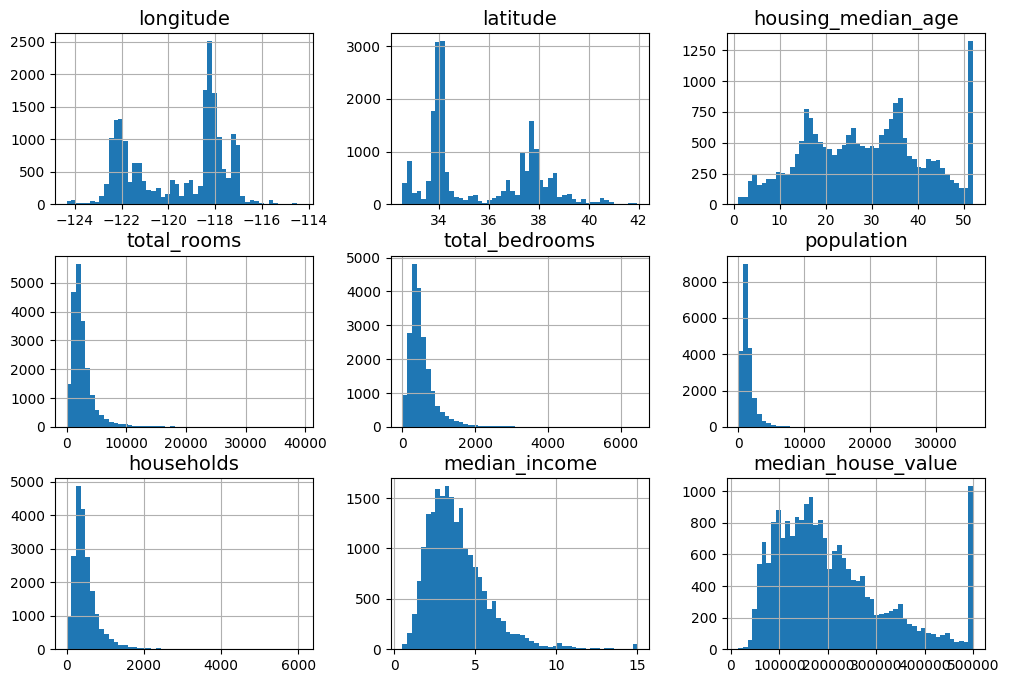

In [64]:
import matplotlib.pyplot as plt

# this is a comment – the next 5 lines define the plot style
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()


# Homework Question 1 

The seven plots in the provided image show histograms for different attributes of a housing dataset. Here’s what each plot reveals:
1. **housing_median_age**: This histogram indicates the age distribution of houses. Most homes have an age below 30 years, with a high frequency around 20–30 years. There’s a significant spike at the upper limit of 50, suggesting that this may be a capped value in the data.
2. **total_rooms**: The distribution of total rooms in households is highly skewed to the right, with most properties having fewer than 10,000 rooms. A small number of outliers exist with significantly higher room counts, likely representing large properties or multi-unit buildings.
3. **total_bedrooms**: Similar to total_rooms, this plot is also right-skewed, with most properties having a lower count of bedrooms. The distribution suggests that the majority of properties have fewer than 2,000 bedrooms, with a few outliers.
4. **population**: This histogram shows the population distribution per housing block or region. Most regions have a population below 5,000, but there are some with populations much higher, though rare, up to about 35,000.
5.	**households**: This histogram shows the distribution of households in each block. It is also right-skewed, with most regions having fewer than 2,000 households, but a few areas have significantly higher household counts.
6.	**median_income**: This histogram is relatively balanced and shows the distribution of median income in the dataset. Most values fall between 2 to 8 (in tens of thousands of dollars), with a few reaching higher income levels.
7.	**median_house_value**: The distribution of median house values is right-skewed, with most values falling below $500,000. There’s a notable spike at the upper end of the data, suggesting that the maximum value might be capped, possibly around $500,000.


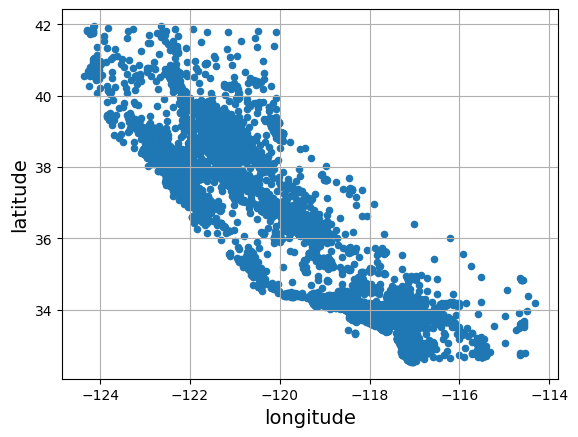

In [65]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()


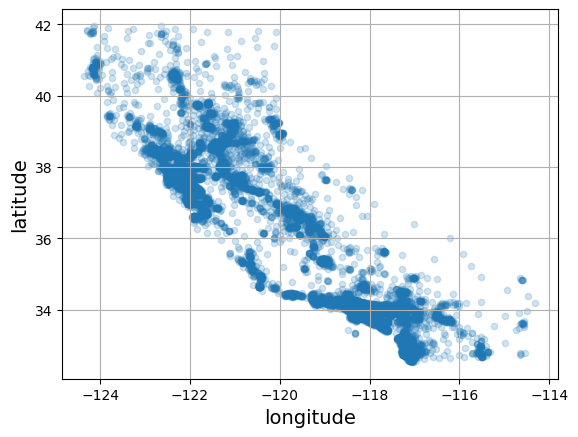

In [66]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()


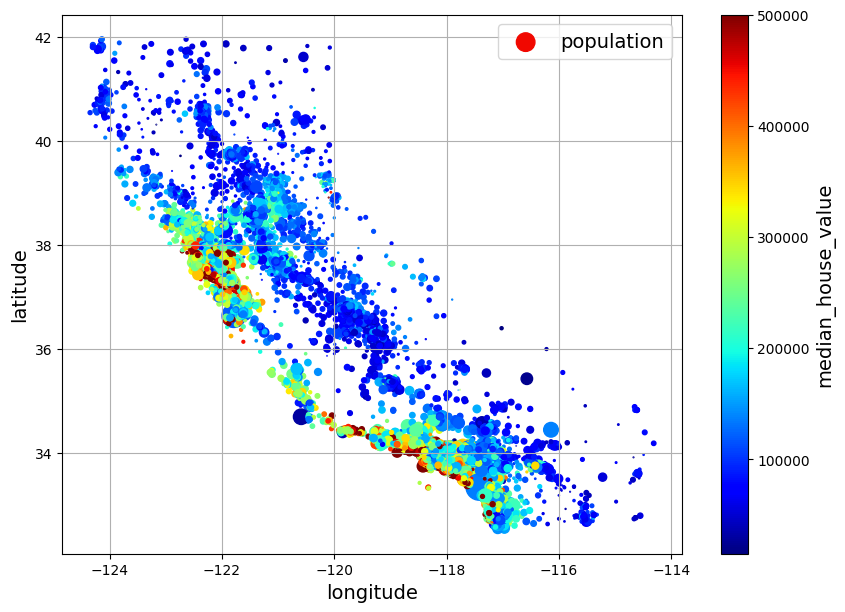

In [67]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()


# Homework Question 2
### Visualization Analysis: Scatter Plot of Housing Data in California

This visualization is a scatter plot showing the distribution of housing data across a geographical area, likely California, based on longitude and latitude. Here are the key insights:

1. **Geographical Pattern of Housing Prices**:
   - The color bar represents the median house value, with blue indicating lower values and red indicating higher values.
   - Higher house prices (red/yellow) are clustered in certain regions, notably around latitude 34 to 38 and longitude around -118 to -122. This corresponds to areas like the Los Angeles and San Francisco Bay Area, known for high real estate prices.

2. **Population Density**:
   - The size of each point indicates the population of each location, with larger circles representing more populated areas.
   - Areas with larger circles (higher population density) tend to be closer to the coast and urban regions. This shows that densely populated areas are primarily along the coastline, particularly in Southern and Northern California.

3. **Relationship Between Population Density and Housing Prices**:
   - High median house values seem to correlate with densely populated areas, especially near urban centers. This suggests a trend where more populated areas have higher property values, possibly due to demand.

4. **Geographical Spread of Lower-Priced Housing**:
   - Blue and green dots, representing lower median house values, are more spread out across inland areas, away from major coastal cities. These regions are less densely populated, indicating that housing prices are lower in more rural or suburban areas.

5. **Potential Capping of Median House Value**:
   - The color intensity reaches a cap at the upper end (around 500,000), which may suggest that the dataset has a maximum value limit for median house prices, commonly done in housing datasets.

This plot provides a spatial overview of how housing prices and population density vary across different regions, highlighting the concentration of high-value properties in coastal and densely populated areas of California.



In [68]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix.head()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

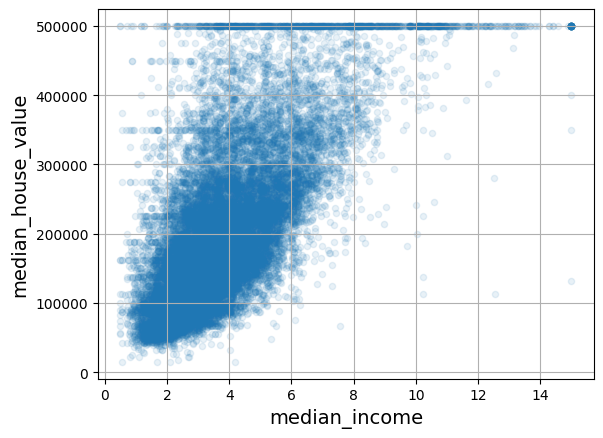

In [69]:
housing.plot(kind="scatter", x="median_income", 
             y="median_house_value",
             alpha=0.1, grid=True)
plt.show()


In [70]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

# Homework Question 3
### Analysis of New Features: rooms_per_house, bedrooms_ratio, and people_per_house

The three newly created features — `rooms_per_house`, `bedrooms_ratio`, and `people_per_house` — offer additional insights into the housing dataset and its relationship to housing values. Here’s an interpretation of each feature based on its correlation with `median_house_value`:

1. **rooms_per_house**:
   - This feature represents the average number of rooms per household.
   - The correlation with `median_house_value` is positive (0.151948), indicating a slight positive relationship. Areas with a higher average number of rooms per household tend to have slightly higher house values.
   - This could be because houses with more rooms are often larger and may be located in more affluent areas, hence slightly boosting the median house value.

2. **bedrooms_ratio**:
   - This is the ratio of bedrooms to total rooms, indicating what portion of total rooms are bedrooms.
   - The correlation with `median_house_value` is negative (-0.255880), suggesting that a higher bedroom-to-room ratio is associated with lower house values.
   - This could imply that properties with a high number of bedrooms relative to total rooms may be smaller or more compact, possibly signifying less luxurious housing, which tends to be less expensive. Higher-end houses may have more non-bedroom spaces like living rooms, dining areas, or offices, lowering the `bedrooms_ratio`.

3. **people_per_house**:
   - This feature calculates the average number of people per household.
   - Its correlation with `median_house_value` is slightly negative (-0.023737), indicating a weak inverse relationship.
   - Although the effect is small, areas with a higher number of people per household might have lower house values, potentially due to larger households often being found in areas with more affordable housing. Higher density within households might indicate shared spaces and lower per capita resources, correlating with lower property values.




In [71]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


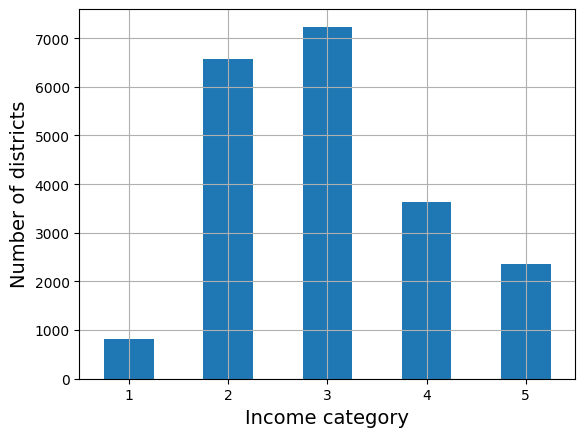

In [72]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()



In [73]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64


In [74]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [75]:
housing_cat = housing[["ocean_proximity"]]
print(type(housing_cat))
housing_cat.head(8)


<class 'pandas.core.frame.DataFrame'>


,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [76]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]


array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [77]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot[:8]


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [78]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [79]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
 9   bedrooms_ratio      16512 non-null  float64
 10  people_per_house    16512 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


In [80]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)
outlier_pred


array([-1,  1,  1, ...,  1,  1, -1])

In [81]:
print(housing_num)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  rooms

In [82]:
# prompt: convert housing_median_age column using minmaxscaler and print the whole dataframe housing_num after convert

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
housing_num['housing_median_age'] = scaler.fit_transform(housing_num[['housing_median_age']])
print(housing_num)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80            1.000000       3321.0          1115.0   
14973    -118.38     34.14            0.764706       1965.0           354.0   
3785     -121.98     38.36            0.627451       1083.0           217.0   
14689    -117.11     33.75            0.313725       4174.0           851.0   
20507    -118.15     33.77            0.686275       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86            0.784314       2237.0           597.0   
13105    -119.31     36.32            0.431373       2945.0           592.0   
19301    -117.06     32.59            0.235294       3920.0           775.0   
19121    -118.40     34.06            0.705882       3781.0           873.0   
19888    -122.41     37.66            0.843137        431.0           195.0   

       population  households  median_income  rooms

In [83]:
# prompt: convert median_income column using standardscaler and print the whole dataframe housing_num after convert

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_num['median_income'] = scaler.fit_transform(housing_num[['median_income']])
print(housing_num)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80            1.000000       3321.0          1115.0   
14973    -118.38     34.14            0.764706       1965.0           354.0   
3785     -121.98     38.36            0.627451       1083.0           217.0   
14689    -117.11     33.75            0.313725       4174.0           851.0   
20507    -118.15     33.77            0.686275       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86            0.784314       2237.0           597.0   
13105    -119.31     36.32            0.431373       2945.0           592.0   
19301    -117.06     32.59            0.235294       3920.0           775.0   
19121    -118.40     34.06            0.705882       3781.0           873.0   
19888    -122.41     37.66            0.843137        431.0           195.0   

       population  households  median_income  rooms

In [84]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,1.651200e+04,16512.000000,16344.000000,16512.000000
mean,-119.573125,35.637746,0.540729,2639.402798,538.949094,1425.513929,499.990189,7.611267e-17,5.441010,0.212796,2.995974
std,2.000624,2.133294,0.246779,2185.287466,423.862079,1094.795467,382.865787,1.000030e+00,2.574143,0.057417,4.457373
min,-124.350000,32.550000,0.000000,2.000000,1.000000,3.000000,1.000000,-1.781577e+00,0.888889,0.100000,0.692308
25%,-121.800000,33.930000,0.333333,1447.000000,296.000000,787.000000,279.000000,-6.913383e-01,4.443636,0.175257,2.433426
50%,-118.510000,34.260000,0.549020,2125.000000,434.000000,1167.000000,408.000000,-1.754490e-01,5.235573,0.203106,2.822316
75%,-118.010000,37.720000,0.705882,3154.000000,645.000000,1726.000000,603.000000,4.649198e-01,6.053843,0.239421,3.286385
max,-114.490000,41.950000,1.000000,39320.000000,6210.000000,16305.000000,5358.000000,5.882868e+00,141.909091,1.000000,502.461538
